In [1]:
import os

import pandas as pd
import geopandas as gpd

from matplotlib import pyplot as plt

from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

%matplotlib inline

Read digitized and segmentation

In [2]:
blacklist = [str(x) for x in [10, 17, 22]]

In [3]:
digitized = {str(k):gpd.read_file(f'../data/Digitization/FID{k}_Digitiz.shp') for k in range(24) if k not in blacklist}
for _, df in digitized.items():
    df['area'] = df.geometry.area

segmentized_all = gpd.read_file('../data/classified_test.gpkg')
segmentized_all = segmentized_all.to_crs(digitized['0'].crs)
segmentized_all['sample_id'] = segmentized_all['segment_id'].str.split('_').str[0]
segmentized_all = segmentized_all.loc[segmentized_all['class_right'].isin(['concrete', 'tin'])]

segmentized = {k:segmentized_all.loc[segmentized_all['sample_id'] == k] for k in segmentized_all.sample_id.unique()}
for _, df in segmentized.items():
    df.loc[:, 'area'] = df.geometry.area

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
strata_samples = {
    'residential': [13, 6, 0, 23, 8],
    'rural': [5, 19],
    'shanty': [3, 9, 2],
    'urbanirreg': [21, 15, 18, 16],
    'urbanreg': [11, 20, 4, 1, 7, 14, 12]
}

In [10]:
# Area of segments
for stratum, sample_list in strata_samples.items():
    print(f'\n==== {stratum} ====')
    for i in sample_list:
        area_digitized = digitized[str(i)].area.sum()
        area_segmentized = segmentized[str(i)].area.sum()
        print(f'Sample {i}: {area_digitized} / {area_segmentized} / {area_segmentized/area_digitized}')


==== residential ====
Sample 13: 5638.84401914544 / 5527.664370684624 / 0.9802832552056184
Sample 6: 7040.413378116934 / 6094.402413038617 / 0.8656313323847268
Sample 0: 5457.736855032161 / 5356.77137440056 / 0.98150048576664
Sample 23: 8697.328302132104 / 7420.19423444432 / 0.8531578867300316
Sample 8: 13445.463389830038 / 12224.273441449073 / 0.9091745733877304

==== rural ====
Sample 5: 3791.4826927396794 / 6026.316506280778 / 1.5894353198078917
Sample 19: 2601.5822957429173 / 2924.1549454352858 / 1.1239909459025026

==== shanty ====
Sample 3: 23816.70896194585 / 32374.391065766897 / 1.359314215809348
Sample 9: 15494.600315509506 / 17936.094923461587 / 1.157570673540268
Sample 2: 22625.319291250846 / 30504.581915790583 / 1.348249787024514

==== urbanirreg ====
Sample 21: 21505.274019688924 / 22390.46455717778 / 1.041161555843391
Sample 15: 21585.946445378962 / 29677.676169165694 / 1.3748610117356692
Sample 18: 14541.825617151757 / 16971.82660481164 / 1.167104258546035
Sample 16: 17

In [11]:
# Number of segments
for stratum, sample_list in strata_samples.items():
    print(f'\n==== {stratum} ====')
    for i in sample_list:
        n_digitized = len(digitized[str(i)])
        n_segmentized = len(segmentized[str(i)])
        print(f'Sample {i}: {n_digitized} / {n_segmentized} / {n_segmentized/n_digitized}')


==== residential ====
Sample 13: 45 / 127 / 2.8222222222222224
Sample 6: 45 / 89 / 1.9777777777777779
Sample 0: 38 / 106 / 2.789473684210526
Sample 23: 52 / 112 / 2.1538461538461537
Sample 8: 97 / 175 / 1.8041237113402062

==== rural ====
Sample 5: 103 / 164 / 1.5922330097087378
Sample 19: 95 / 101 / 1.063157894736842

==== shanty ====
Sample 3: 650 / 642 / 0.9876923076923076
Sample 9: 354 / 384 / 1.0847457627118644
Sample 2: 440 / 697 / 1.584090909090909

==== urbanirreg ====
Sample 21: 382 / 476 / 1.2460732984293195
Sample 15: 739 / 770 / 1.0419485791610283
Sample 18: 326 / 558 / 1.7116564417177915
Sample 16: 416 / 524 / 1.2596153846153846

==== urbanreg ====
Sample 11: 330 / 394 / 1.1939393939393939
Sample 20: 434 / 406 / 0.9354838709677419
Sample 4: 211 / 355 / 1.6824644549763033
Sample 1: 137 / 310 / 2.2627737226277373
Sample 7: 69 / 176 / 2.550724637681159
Sample 14: 160 / 312 / 1.95
Sample 12: 385 / 468 / 1.2155844155844155


In [30]:
for stratum, sample_list in strata_samples.items():
    print(f'\n==== {stratum} ====')
    stratum_digi = pd.concat([v[['geometry']] for k,v in digitized.items() if int(k) in sample_list])     
    stratum_segm = pd.concat([v[['geometry']] for k,v in segmentized.items() if int(k) in sample_list])   
    print(stratum_digi.area.sum(), stratum_segm.area.sum(), stratum_segm.area.sum()/stratum_digi.area.sum())
    print(len(stratum_digi), len(stratum_segm), len(stratum_segm)/len(stratum_digi))


==== residential ====
40279.78594425668 36623.30583401719 0.9092229508046616
277 609 2.1985559566787005

==== rural ====
6393.064988482596 8950.471451716065 1.4000282286885484
198 265 1.3383838383838385

==== shanty ====
61936.62856870621 80815.06790501907 1.3048025017275686
1444 1723 1.193213296398892

==== urbanirreg ====
74815.11570963549 88736.07246836915 1.1860714459463273
1863 2328 1.249597423510467

==== urbanreg ====
110124.59434882668 143483.61681693213 1.3029207296095786
1726 2421 1.402665121668598


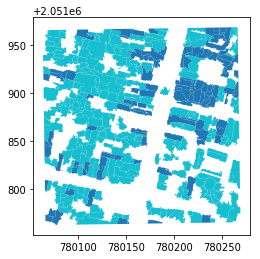

In [9]:
segmentized['11'].plot(column='class_right')

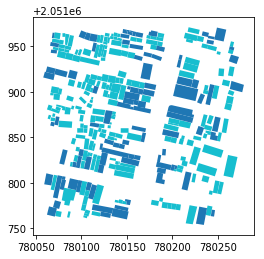

In [10]:
digitized['11'].plot(column='Roof')

In [62]:
digi_all = pd.concat([df[['geometry', 'Roof', 'area']] for df in digitized.values()])
segmentized_all_centroids = segmentized_all.copy()
segmentized_all_centroids.geometry = segmentized_all_centroids.geometry.centroid
df = gpd.sjoin(segmentized_all_centroids, digi_all, op='within')

In [65]:
roof_lookup = {
    'RC': 'concrete',
    'Tin': 'tin'
}

df['correct'] = df['Roof'].map(roof_lookup) == df['class_right']

In [66]:
df.shape

(5108, 110)

In [68]:
df.loc[df['correct']].shape

(4261, 110)

In [69]:
4261/5108

0.8341816758026624

In [70]:
df.correct.value_counts()

True     4261
False     847
Name: correct, dtype: int64